# <h1> <span style="font-family:Times New Roman"> <span style="color:Green"> Importing the library </span> </span> </h1>

In [1]:
#importing the basic library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# stats model library
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sk learn library
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

## <h2> <span style="font-family:Times New Roman"> <span style="color:black"> ignore the warning </span> </span> </h2> 

In [2]:
# too ignoore the warnings

import warnings
warnings.filterwarnings('ignore')

# import steps:
- step1: reading and understand the data 
- step2: cleaning the data
- step3: EDA
- step4: Data visualization
- step5: Training the model
- step6: Residual analysis
- step7: predicting and evaluating 

# Step1: Reading and understand the data

In [3]:
# read the data set
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


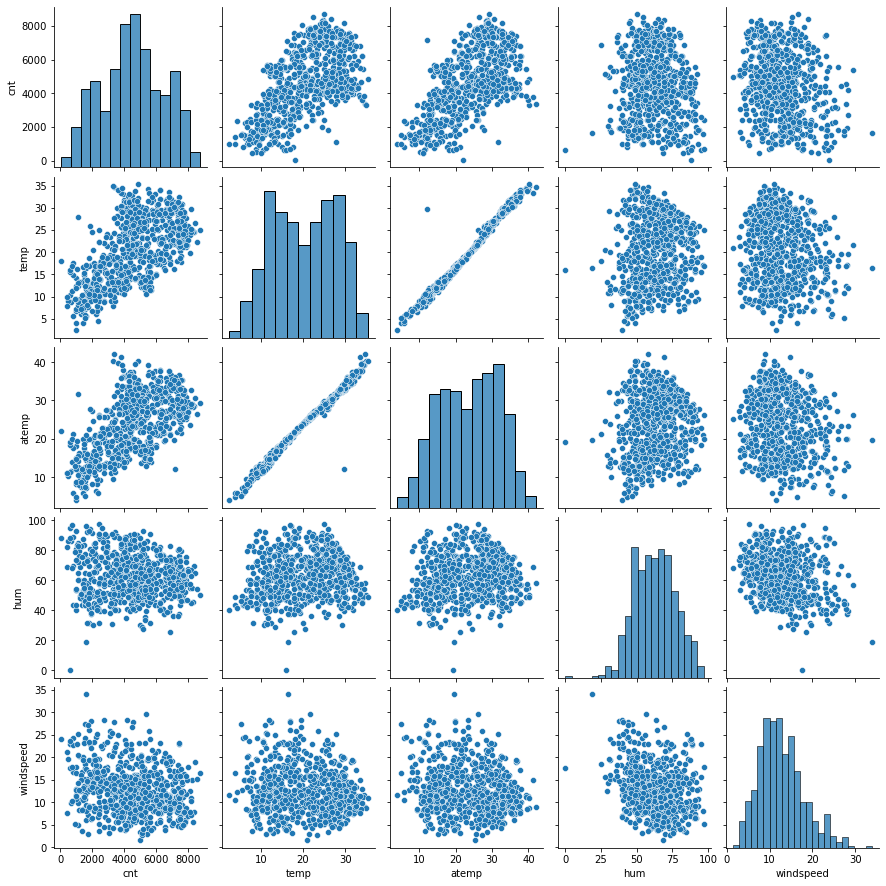

In [7]:
sns.pairplot(data=df,vars=['cnt', 'temp','atemp','hum','windspeed'])
plt.show()

### Note: temp and atemp are the two numerical variables which are highly correlated with the target variable (cnt)

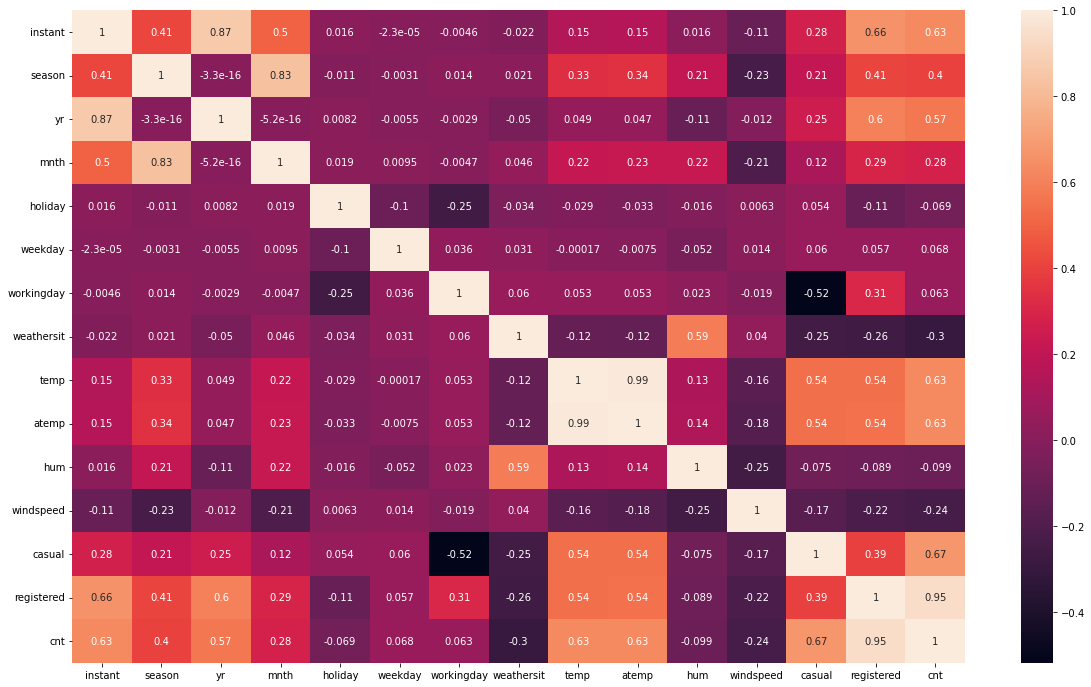

In [8]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Step2: cleaning the data

## Droping the colums

In [9]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Dropping the not used column in the model bulding

In [10]:
df.drop(['instant','dteday','casual','registered','atemp'],axis=1,inplace=True)

In [11]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


# Step3:EDA

In [13]:
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## converting the numarical data into readable formate 

In [14]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,43.6957,12.522300,1600


In [15]:
df.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [16]:
df.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.023202,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,-0.098543,-0.235132,1.000000


# step4: Data visualization


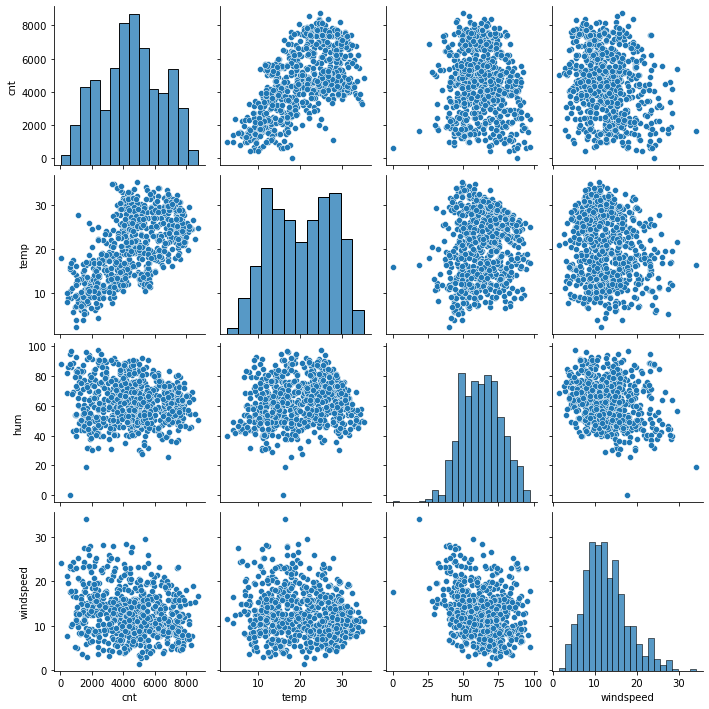

In [17]:
# visualization for corr
sns.pairplot(data=df,vars=['cnt', 'temp', 'hum','windspeed'])
plt.show()

Text(0.5, 1.0, 'working day vs count')

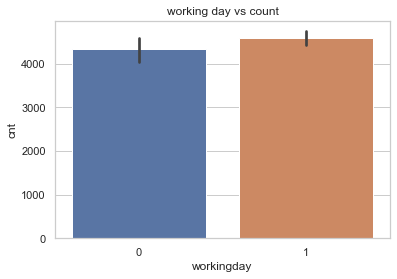

In [18]:
sns.set_theme(style="whitegrid")
sns.barplot(x="workingday", y="cnt", data=df)
plt.title("working day vs count")

Text(0.5, 1.0, 'week day vs count')

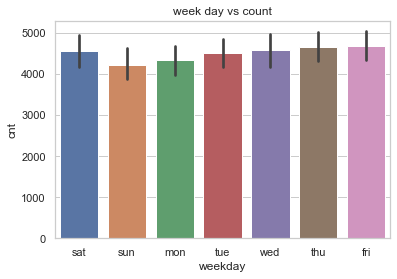

In [19]:
# for week day vs count

sns.barplot(x="weekday", y="cnt", data=df)
plt.title("week day vs count")

Text(0.5, 1.0, 'seasons vs count')

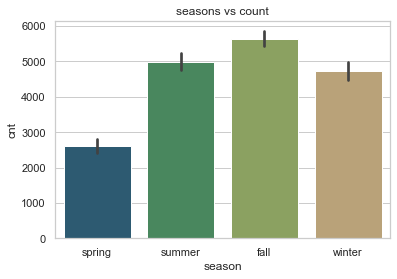

In [20]:
#season vs count
sns.barplot(x="season", y="cnt", data=df,palette="gist_earth")
plt.title("seasons vs count")

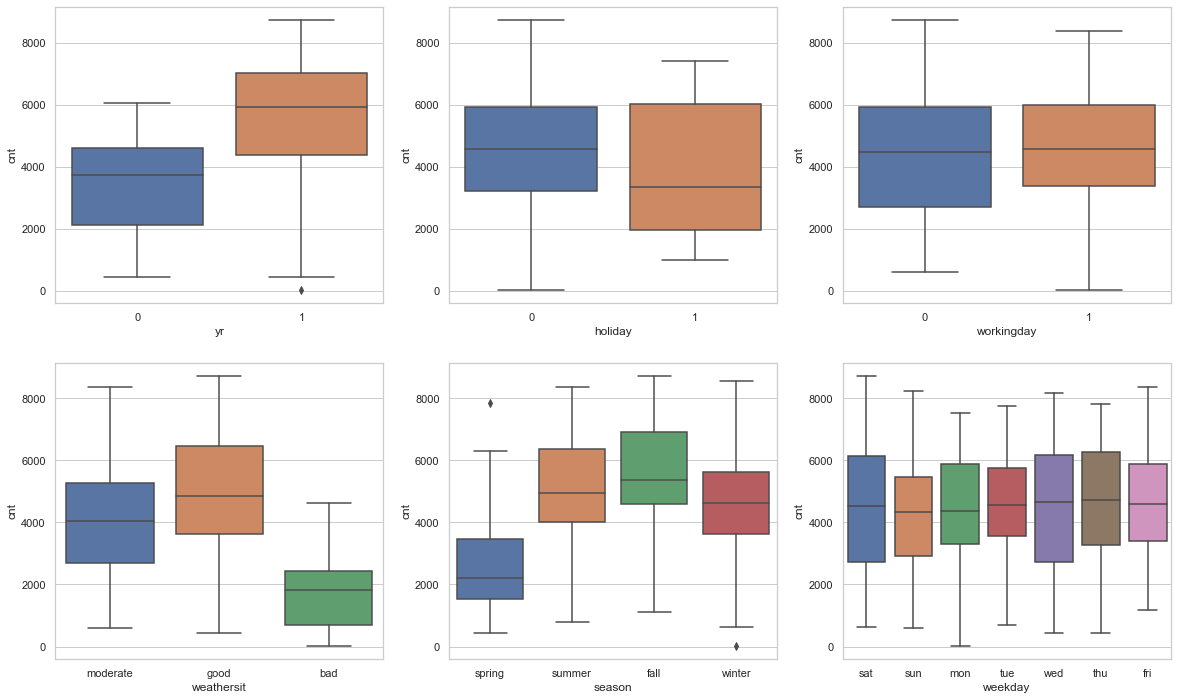

In [21]:
##Relationship between categorical and continuous variable in boxplot to view the avg

plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = df)

plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)

plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)


plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = df)

plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)


plt.show()


<AxesSubplot:title={'center':'month vs count'}, xlabel='mnth', ylabel='cnt'>

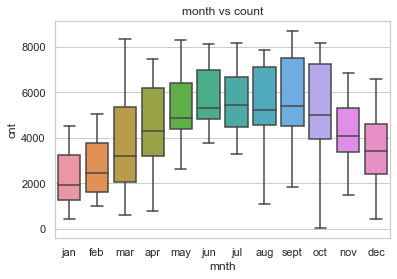

In [22]:
plt.title('month vs count')
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

# Basic understanding
1. in fig1 : As we can see demand increase for 2019 when we compared with 2018
2. in fig2 : The bike are used more in regular days when we compared with holidays
3. in fig3 : Both are in same demand
4. in fig4 : In the month of may to oct the demand is very high due to summer season
5. in fig5 : Good weather means more demand
6. in fig6 : fall and summer season are having more demand
7. in fig7 : avg number of demand is in fixed range only

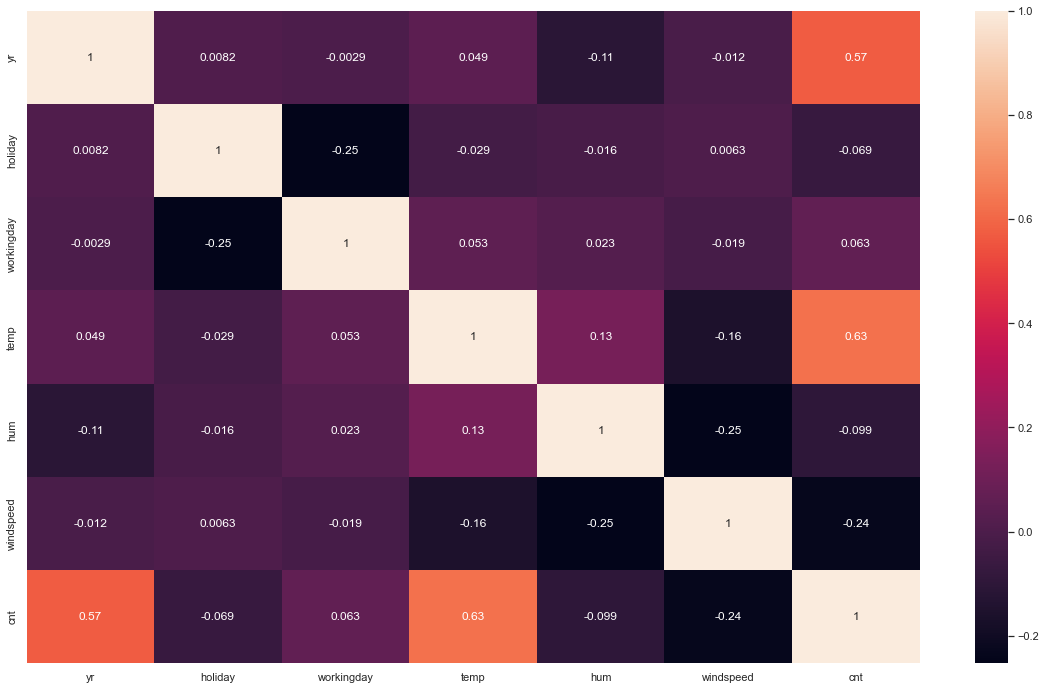

In [23]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),annot=True)
plt.show()

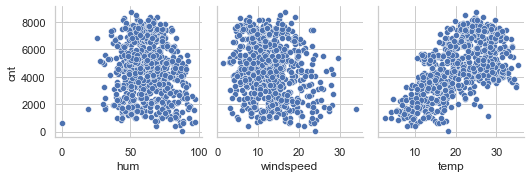

In [24]:
sns.pairplot(data=df,x_vars=['hum','windspeed','temp'],y_vars='cnt')

Text(0.5, 1.0, 'Cnt vs Temp')

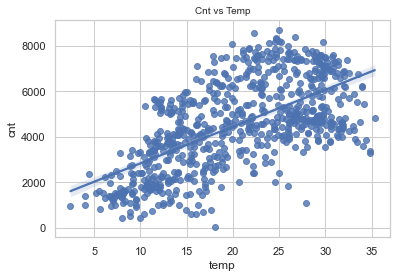

In [25]:
sns.regplot(x='temp',y='cnt',data=df)
plt.title("Cnt vs Temp",fontsize=10)

Text(0.5, 1.0, 'windspeed vs Temp')

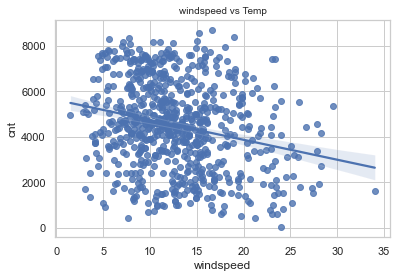

In [26]:
sns.regplot(x='windspeed',y='cnt',data=df)
plt.title("windspeed vs Temp",fontsize=10)

Text(0.5, 1.0, 'hum vs Temp')

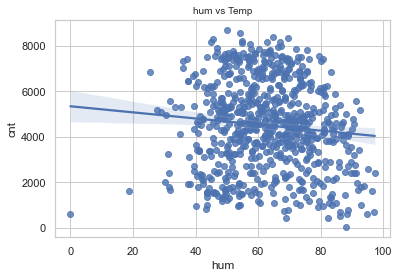

In [27]:
sns.regplot(x='hum',y='cnt',data=df)
plt.title("hum vs Temp",fontsize=10)

## creating the dummy variables

In [28]:
pd.set_option("max_columns", 37)
df1 = pd.get_dummies(data=df,columns=["season","mnth","weekday",'weathersit'],drop_first=True)

In [29]:
df1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [30]:
df1.shape

(730, 29)

In [31]:
df1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


# spliting the dataset

In [32]:
df_train, df_test = train_test_split(df1, train_size=0.7, random_state= 50)
print(f'Train Shape: {df_train.shape}, Test Shape: {df_test.shape}' )

Train Shape: (510, 29), Test Shape: (220, 29)


In [33]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
172,0,0,1,30.066653,70.7500,11.541554,4507,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
14,0,0,0,9.566653,49.8750,10.583521,1248,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
204,0,0,0,34.030000,55.0833,11.334457,3606,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
182,0,0,0,30.271653,44.4583,7.709154,5119,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
708,1,0,1,17.869153,92.5000,12.750636,5170,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [34]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
172,0,0,1,30.066653,70.7500,11.541554,4507,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
14,0,0,0,9.566653,49.8750,10.583521,1248,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
204,0,0,0,34.030000,55.0833,11.334457,3606,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
182,0,0,0,30.271653,44.4583,7.709154,5119,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
708,1,0,1,17.869153,92.5000,12.750636,5170,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [35]:
scaler = MinMaxScaler()

In [36]:
scale = MinMaxScaler()
num_features = ['temp', 'hum', 'windspeed','cnt']
df_train[num_features] = scale.fit_transform(df_train[num_features])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
172,0,0,1,0.865247,0.729068,0.274549,0.515992,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
14,0,0,0,0.223565,0.513954,0.243603,0.141049,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
204,0,0,0,0.989306,0.567625,0.267859,0.412333,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
182,0,0,0,0.871664,0.458136,0.150755,0.586401,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
708,1,0,1,0.483446,0.953198,0.313605,0.592269,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

# model1

In [38]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     107.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.86e-185
Time:                        09:22:31   Log-Likelihood:                 538.30
No. Observations:                 510   AIC:                            -1021.
Df Residuals:                     482   BIC:                            -902.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1081      0.044      2.482      0.013       0.023       0.194
yr                      0.2335      0.008     29.647      0.000       0.218       0.249
holiday                 0.0011      0.025      0.043      0.966      -0.048       0.050
workingday              0.0485      0.014      3.567      0.000       0.022       0.075
temp                    0.4508      0.046      9.905      0.000       0.361       0.540
hum                    -0.1970      0.038     -5.137      0.000      -0.272      -0.122
windspeed              -0.1911      0.025     -7.504      0.000      -0.241      -0.141
season_spring          -0.0670      0.030     -2.248      0.025      -0.126      -0.008
season_summer           0.0227      0.025      0.913      0.362      -0.026       0.072
season_winter           0.1231      0.029      4.204      0.000       0.066       0.181
mnth_aug               -0.0069      0.033     -0.211      0.833      -0.071       0.057
mnth_dec               -0.0695      0.034     -2.039      0.042      -0.136      -0.003
mnth_feb               -0.0329      0.033     -1.001      0.317      -0.097       0.032
mnth_jan               -0.0581      0.034     -1.685      0.093      -0.126       0.010
mnth_jul               -0.0283      0.034     -0.838      0.403      -0.095       0.038
mnth_jun                0.0179      0.024      0.747      0.455      -0.029       0.065
mnth_mar             -6.05e-05      0.026     -0.002      0.998      -0.051       0.050
mnth_may                0.0264      0.020      1.326      0.185      -0.013       0.065
mnth_nov               -0.0768      0.037     -2.092      0.037      -0.149      -0.005
mnth_oct               -0.0175      0.036     -0.490      0.624      -0.087       0.053
mnth_sept               0.0577      0.032      1.833      0.067      -0.004       0.120
weekday_mon            -0.0259      0.014     -1.788      0.074      -0.054       0.003
weekday_sat             0.0555      0.015      3.651      0.000       0.026       0.085
weekday_sun             0.0031      0.015      0.201      0.841      -0.027       0.033
weekday_thu          -3.61e-05      0.014     -0.002      0.998      -0.028       0.028
weekday_tue            -0.0208      0.014     -1.455      0.146      -0.049       0.007
weekday_wed            -0.0082      0.015     -0.562      0.574      -0.037       0.021
weathersit_good         0.2130      0.026      8.341      0.000       0.163       0.263
weathersit_moderate     0.1668      0.024      6.972      0.000       0.120       0.214
==============================================================================
Omnibus:                       94.659   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.657
Skew:                         

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,141.75
21,weekday_sat,27.29
22,weekday_sun,26.99
6,season_spring,11.17
8,season_winter,10.96
26,weathersit_good,10.36
27,weathersit_moderate,8.74
7,season_summer,7.97
3,temp,7.47
17,mnth_nov,7.37


#  model 2

In [40]:
#mnth_mar
X = X_train.drop('mnth_mar', axis=1)

In [41]:
# build a model with all variables
X_train_sm = sm.add_constant(X)

#creating the 1st model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model=lr.fit()
#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     111.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.42e-186
Time:                        09:22:31   Log-Likelihood:                 538.30
No. Observations:                 510   AIC:                            -1023.
Df Residuals:                     483   BIC:                            -908.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1081      0.041      2.622      0.009       0.027       0.189
yr                      0.2335      0.008     29.703      0.000       0.218       0.249
holiday                 0.0011      0.025      0.043      0.966      -0.048       0.050
workingday              0.0485      0.013      3.707      0.000       0.023       0.074
temp                    0.4508      0.044     10.142      0.000       0.363       0.538
hum                    -0.1970      0.038     -5.145      0.000      -0.272      -0.122
windspeed              -0.1911      0.025     -7.512      0.000      -0.241      -0.141
season_spring          -0.0670      0.028     -2.409      0.016      -0.122      -0.012
season_summer           0.0227      0.024      0.933      0.351      -0.025       0.070
season_winter           0.1231      0.028      4.341      0.000       0.067       0.179
mnth_aug               -0.0069      0.031     -0.222      0.825      -0.068       0.054
mnth_dec               -0.0694      0.025     -2.778      0.006      -0.119      -0.020
mnth_feb               -0.0328      0.021     -1.584      0.114      -0.074       0.008
mnth_jan               -0.0580      0.022     -2.617      0.009      -0.102      -0.014
mnth_jul               -0.0283      0.032     -0.874      0.383      -0.092       0.035
mnth_jun                0.0180      0.023      0.785      0.433      -0.027       0.063
mnth_may                0.0264      0.019      1.406      0.160      -0.010       0.063
mnth_nov               -0.0767      0.030     -2.575      0.010      -0.135      -0.018
mnth_oct               -0.0174      0.029     -0.592      0.554      -0.075       0.040
mnth_sept               0.0578      0.029      2.008      0.045       0.001       0.114
weekday_mon            -0.0259      0.014     -1.790      0.074      -0.054       0.003
weekday_sat             0.0555      0.015      3.744      0.000       0.026       0.085
weekday_sun             0.0031      0.015      0.204      0.838      -0.026       0.032
weekday_thu          -3.51e-05      0.014     -0.002      0.998      -0.028       0.028
weekday_tue            -0.0208      0.014     -1.457      0.146      -0.049       0.007
weekday_wed            -0.0082      0.015     -0.563      0.574      -0.037       0.021
weathersit_good         0.2130      0.026      8.350      0.000       0.163       0.263
weathersit_moderate     0.1668      0.024      6.981      0.000       0.120       0.214
==============================================================================
Omnibus:                       94.659   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.633
Skew:                          -0.862   Prob(JB):                     1.73e-64
Kurtosis:                       6.293  

In [42]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,126.79
20,weekday_sat,24.54
21,weekday_sun,24.41
25,weathersit_good,10.36
8,season_winter,10.30
6,season_spring,9.76
26,weathersit_moderate,8.74
7,season_summer,7.65
3,temp,7.14
1,holiday,5.52


#  model 3

In [43]:
X = X.drop('weekday_sun', axis=1)

In [44]:
# build a model with all variables
X_train_sm = sm.add_constant(X)

#creating the 1st model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model=lr.fit()
#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     111.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.42e-186
Time:                        09:22:31   Log-Likelihood:                 538.30
No. Observations:                 510   AIC:                            -1023.
Df Residuals:                     483   BIC:                            -908.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1112      0.052      2.144      0.033       0.009       0.213
yr                      0.2335      0.008     29.703      0.000       0.218       0.249
holiday                -0.0020      0.030     -0.065      0.948      -0.061       0.057
workingday              0.0454      0.015      3.082      0.002       0.016       0.074
temp                    0.4508      0.044     10.142      0.000       0.363       0.538
hum                    -0.1970      0.038     -5.145      0.000      -0.272      -0.122
windspeed              -0.1911      0.025     -7.512      0.000      -0.241      -0.141
season_spring          -0.0670      0.028     -2.409      0.016      -0.122      -0.012
season_summer           0.0227      0.024      0.933      0.351      -0.025       0.070
season_winter           0.1231      0.028      4.341      0.000       0.067       0.179
mnth_aug               -0.0069      0.031     -0.222      0.825      -0.068       0.054
mnth_dec               -0.0694      0.025     -2.778      0.006      -0.119      -0.020
mnth_feb               -0.0328      0.021     -1.584      0.114      -0.074       0.008
mnth_jan               -0.0580      0.022     -2.617      0.009      -0.102      -0.014
mnth_jul               -0.0283      0.032     -0.874      0.383      -0.092       0.035
mnth_jun                0.0180      0.023      0.785      0.433      -0.027       0.063
mnth_may                0.0264      0.019      1.406      0.160      -0.010       0.063
mnth_nov               -0.0767      0.030     -2.575      0.010      -0.135      -0.018
mnth_oct               -0.0174      0.029     -0.592      0.554      -0.075       0.040
mnth_sept               0.0578      0.029      2.008      0.045       0.001       0.114
weekday_mon            -0.0259      0.014     -1.790      0.074      -0.054       0.003
weekday_sat             0.0524      0.015      3.488      0.001       0.023       0.082
weekday_thu          -3.51e-05      0.014     -0.002      0.998      -0.028       0.028
weekday_tue            -0.0208      0.014     -1.457      0.146      -0.049       0.007
weekday_wed            -0.0082      0.015     -0.563      0.574      -0.037       0.021
weathersit_good         0.2130      0.026      8.350      0.000       0.163       0.263
weathersit_moderate     0.1668      0.024      6.981      0.000       0.120       0.214
==============================================================================
Omnibus:                       94.659   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.633
Skew:                          -0.862   Prob(JB):                     1.73e-64
Kurtosis:                       6.293   Cond. No.                         34.4
================================================

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,44.96
4,hum,30.82
24,weathersit_good,16.80
8,season_winter,12.61
2,workingday,10.14
6,season_spring,10.05
25,weathersit_moderate,9.52
7,season_summer,7.97
9,mnth_aug,5.36
13,mnth_jul,5.19


# model 4

In [46]:
#weekday_thu
X = X.drop('weekday_thu', axis=1)

In [47]:
# build a model with all variables
X_train_sm = sm.add_constant(X)

#creating the 1st model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model=lr.fit()
#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     116.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.88e-187
Time:                        09:22:31   Log-Likelihood:                 538.30
No. Observations:                 510   AIC:                            -1025.
Df Residuals:                     484   BIC:                            -914.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1112      0.052      2.146      0.032       0.009       0.213
yr                      0.2335      0.008     29.742      0.000       0.218       0.249
holiday                -0.0020      0.029     -0.068      0.946      -0.060       0.056
workingday              0.0454      0.013      3.543      0.000       0.020       0.071
temp                    0.4508      0.044     10.164      0.000       0.364       0.538
hum                    -0.1970      0.038     -5.151      0.000      -0.272      -0.122
windspeed              -0.1911      0.025     -7.530      0.000      -0.241      -0.141
season_spring          -0.0670      0.028     -2.412      0.016      -0.122      -0.012
season_summer           0.0227      0.024      0.935      0.350      -0.025       0.070
season_winter           0.1231      0.028      4.347      0.000       0.067       0.179
mnth_aug               -0.0069      0.031     -0.222      0.825      -0.068       0.054
mnth_dec               -0.0694      0.025     -2.782      0.006      -0.118      -0.020
mnth_feb               -0.0328      0.021     -1.586      0.113      -0.074       0.008
mnth_jan               -0.0580      0.022     -2.619      0.009      -0.102      -0.015
mnth_jul               -0.0283      0.032     -0.876      0.381      -0.092       0.035
mnth_jun                0.0180      0.023      0.789      0.431      -0.027       0.063
mnth_may                0.0264      0.019      1.409      0.160      -0.010       0.063
mnth_nov               -0.0767      0.030     -2.577      0.010      -0.135      -0.018
mnth_oct               -0.0174      0.029     -0.593      0.554      -0.075       0.040
mnth_sept               0.0578      0.029      2.013      0.045       0.001       0.114
weekday_mon            -0.0259      0.013     -2.069      0.039      -0.050      -0.001
weekday_sat             0.0524      0.015      3.491      0.001       0.023       0.082
weekday_tue            -0.0208      0.012     -1.689      0.092      -0.045       0.003
weekday_wed            -0.0082      0.013     -0.650      0.516      -0.033       0.017
weathersit_good         0.2130      0.025      8.364      0.000       0.163       0.263
weathersit_moderate     0.1668      0.024      7.002      0.000       0.120       0.214
==============================================================================
Omnibus:                       94.656   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.620
Skew:                          -0.862   Prob(JB):                     1.74e-64
Kurtosis:                       6.293   Cond. No.                         34.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,44.84
4,hum,30.81
23,weathersit_good,16.77
8,season_winter,12.60
6,season_spring,10.05
24,weathersit_moderate,9.48
7,season_summer,7.96
2,workingday,7.58
9,mnth_aug,5.36
13,mnth_jul,5.17


# model 5

In [49]:
#mnth_oct
X = X.drop('mnth_oct', axis=1)

In [50]:
# build a model with all variables
X_train_sm = sm.add_constant(X)

#creating the 1st model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model=lr.fit()
#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     121.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.27e-188
Time:                        09:22:32   Log-Likelihood:                 538.12
No. Observations:                 510   AIC:                            -1026.
Df Residuals:                     485   BIC:                            -920.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1067      0.051      2.084      0.038       0.006       0.207
yr                      0.2333      0.008     29.778      0.000       0.218       0.249
holiday                -0.0028      0.029     -0.095      0.924      -0.060       0.055
workingday              0.0456      0.013      3.558      0.000       0.020       0.071
temp                    0.4499      0.044     10.157      0.000       0.363       0.537
hum                    -0.1987      0.038     -5.214      0.000      -0.274      -0.124
windspeed              -0.1913      0.025     -7.540      0.000      -0.241      -0.141
season_spring          -0.0649      0.028     -2.357      0.019      -0.119      -0.011
season_summer           0.0272      0.023      1.184      0.237      -0.018       0.072
season_winter           0.1148      0.025      4.669      0.000       0.066       0.163
mnth_aug               -0.0011      0.029     -0.037      0.971      -0.059       0.057
mnth_dec               -0.0590      0.018     -3.325      0.001      -0.094      -0.024
mnth_feb               -0.0297      0.020     -1.484      0.138      -0.069       0.010
mnth_jan               -0.0549      0.022     -2.553      0.011      -0.097      -0.013
mnth_jul               -0.0225      0.031     -0.731      0.465      -0.083       0.038
mnth_jun                0.0207      0.022      0.931      0.352      -0.023       0.065
mnth_may                0.0276      0.019      1.484      0.139      -0.009       0.064
mnth_nov               -0.0629      0.019     -3.390      0.001      -0.099      -0.026
mnth_sept               0.0654      0.026      2.554      0.011       0.015       0.116
weekday_mon            -0.0260      0.012     -2.083      0.038      -0.051      -0.001
weekday_sat             0.0523      0.015      3.486      0.001       0.023       0.082
weekday_tue            -0.0208      0.012     -1.692      0.091      -0.045       0.003
weekday_wed            -0.0083      0.013     -0.656      0.512      -0.033       0.017
weathersit_good         0.2137      0.025      8.403      0.000       0.164       0.264
weathersit_moderate     0.1674      0.024      7.039      0.000       0.121       0.214
==============================================================================
Omnibus:                       96.793   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.947
Skew:                          -0.874   Prob(JB):                     2.22e-67
Kurtosis:                       6.374   Cond. No.                         33.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,44.59
4,hum,29.75
22,weathersit_good,16.71
6,season_spring,10.00
23,weathersit_moderate,9.46
8,season_winter,8.55
2,workingday,7.58
7,season_summer,7.32
9,mnth_aug,4.91
5,windspeed,4.85


# model 6

In [52]:
#mnth_aug
X = X.drop('mnth_aug', axis=1)

In [53]:
# build a model with all variables
X_train_sm = sm.add_constant(X)

#creating the 1st model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model=lr.fit()
#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     127.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.50e-189
Time:                        09:22:32   Log-Likelihood:                 538.11
No. Observations:                 510   AIC:                            -1028.
Df Residuals:                     486   BIC:                            -926.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1062      0.050      2.142      0.033       0.009       0.204
yr                      0.2333      0.008     29.872      0.000       0.218       0.249
holiday                -0.0027      0.029     -0.094      0.925      -0.060       0.055
workingday              0.0456      0.013      3.563      0.000       0.020       0.071
temp                    0.4493      0.041     10.938      0.000       0.369       0.530
hum                    -0.1986      0.038     -5.226      0.000      -0.273      -0.124
windspeed              -0.1912      0.025     -7.604      0.000      -0.241      -0.142
season_spring          -0.0643      0.022     -2.909      0.004      -0.108      -0.021
season_summer           0.0278      0.017      1.597      0.111      -0.006       0.062
season_winter           0.1154      0.018      6.427      0.000       0.080       0.151
mnth_dec               -0.0591      0.018     -3.339      0.001      -0.094      -0.024
mnth_feb               -0.0297      0.020     -1.492      0.136      -0.069       0.009
mnth_jan               -0.0550      0.021     -2.581      0.010      -0.097      -0.013
mnth_jul               -0.0216      0.018     -1.168      0.243      -0.058       0.015
mnth_jun                0.0212      0.017      1.214      0.225      -0.013       0.056
mnth_may                0.0278      0.018      1.579      0.115      -0.007       0.062
mnth_nov               -0.0630      0.019     -3.396      0.001      -0.099      -0.027
mnth_sept               0.0661      0.018      3.660      0.000       0.031       0.102
weekday_mon            -0.0260      0.012     -2.087      0.037      -0.051      -0.002
weekday_sat             0.0523      0.015      3.494      0.001       0.023       0.082
weekday_tue            -0.0208      0.012     -1.694      0.091      -0.045       0.003
weekday_wed            -0.0083      0.013     -0.658      0.511      -0.033       0.016
weathersit_good         0.2137      0.025      8.411      0.000       0.164       0.264
weathersit_moderate     0.1674      0.024      7.048      0.000       0.121       0.214
==============================================================================
Omnibus:                       96.778   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.182
Skew:                          -0.874   Prob(JB):                     1.98e-67
Kurtosis:                       6.377   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,34.80
4,hum,29.47
21,weathersit_good,15.99
22,weathersit_moderate,9.12
2,workingday,7.57
6,season_spring,6.85
5,windspeed,4.84
8,season_winter,4.84
7,season_summer,4.44
11,mnth_jan,2.25


# model 7

In [55]:
#holiday
X = X.drop('holiday', axis=1)

In [56]:
# build a model with all variables
X_train_sm = sm.add_constant(X)

#creating the 1st model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model=lr.fit()
#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     133.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.73e-190
Time:                        09:22:32   Log-Likelihood:                 538.11
No. Observations:                 510   AIC:                            -1030.
Df Residuals:                     487   BIC:                            -932.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1060      0.049      2.142      0.033       0.009       0.203
yr                      0.2333      0.008     29.906      0.000       0.218       0.249
workingday              0.0461      0.012      3.960      0.000       0.023       0.069
temp                    0.4490      0.041     10.973      0.000       0.369       0.529
hum                    -0.1985      0.038     -5.234      0.000      -0.273      -0.124
windspeed              -0.1912      0.025     -7.618      0.000      -0.241      -0.142
season_spring          -0.0644      0.022     -2.919      0.004      -0.108      -0.021
season_summer           0.0278      0.017      1.597      0.111      -0.006       0.062
season_winter           0.1154      0.018      6.434      0.000       0.080       0.151
mnth_dec               -0.0592      0.018     -3.362      0.001      -0.094      -0.025
mnth_feb               -0.0298      0.020     -1.503      0.134      -0.069       0.009
mnth_jan               -0.0551      0.021     -2.591      0.010      -0.097      -0.013
mnth_jul               -0.0216      0.018     -1.173      0.241      -0.058       0.015
mnth_jun                0.0213      0.017      1.220      0.223      -0.013       0.056
mnth_may                0.0278      0.018      1.580      0.115      -0.007       0.062
mnth_nov               -0.0632      0.018     -3.442      0.001      -0.099      -0.027
mnth_sept               0.0659      0.018      3.672      0.000       0.031       0.101
weekday_mon            -0.0264      0.012     -2.251      0.025      -0.049      -0.003
weekday_sat             0.0527      0.014      3.644      0.000       0.024       0.081
weekday_tue            -0.0210      0.012     -1.719      0.086      -0.045       0.003
weekday_wed            -0.0085      0.012     -0.680      0.497      -0.033       0.016
weathersit_good         0.2137      0.025      8.422      0.000       0.164       0.264
weathersit_moderate     0.1674      0.024      7.055      0.000       0.121       0.214
==============================================================================
Omnibus:                       96.884   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.116
Skew:                          -0.875   Prob(JB):                     2.04e-67
Kurtosis:                       6.375   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,34.43
3,hum,29.44
20,weathersit_good,15.98
21,weathersit_moderate,9.11
5,season_spring,6.82
1,workingday,6.28
7,season_winter,4.84
4,windspeed,4.83
6,season_summer,4.42
10,mnth_jan,2.24


# model 8

In [58]:
#weekday_wed
X = X.drop('weekday_wed', axis=1)

In [59]:
# build a model with all variables
X_train_sm = sm.add_constant(X)

#creating the 1st model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model=lr.fit()
#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     139.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.97e-191
Time:                        09:22:32   Log-Likelihood:                 537.87
No. Observations:                 510   AIC:                            -1032.
Df Residuals:                     488   BIC:                            -938.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1056      0.049      2.136      0.033       0.008       0.203
yr                      0.2333      0.008     29.919      0.000       0.218       0.249
workingday              0.0438      0.011      3.932      0.000       0.022       0.066
temp                    0.4491      0.041     10.981      0.000       0.369       0.529
hum                    -0.2003      0.038     -5.299      0.000      -0.275      -0.126
windspeed              -0.1914      0.025     -7.631      0.000      -0.241      -0.142
season_spring          -0.0640      0.022     -2.903      0.004      -0.107      -0.021
season_summer           0.0280      0.017      1.609      0.108      -0.006       0.062
season_winter           0.1159      0.018      6.468      0.000       0.081       0.151
mnth_dec               -0.0594      0.018     -3.373      0.001      -0.094      -0.025
mnth_feb               -0.0302      0.020     -1.521      0.129      -0.069       0.009
mnth_jan               -0.0552      0.021     -2.594      0.010      -0.097      -0.013
mnth_jul               -0.0218      0.018     -1.185      0.237      -0.058       0.014
mnth_jun                0.0212      0.017      1.212      0.226      -0.013       0.055
mnth_may                0.0277      0.018      1.576      0.116      -0.007       0.062
mnth_nov               -0.0634      0.018     -3.456      0.001      -0.099      -0.027
mnth_sept               0.0666      0.018      3.720      0.000       0.031       0.102
weekday_mon            -0.0240      0.011     -2.148      0.032      -0.046      -0.002
weekday_sat             0.0531      0.014      3.679      0.000       0.025       0.081
weekday_tue            -0.0183      0.012     -1.585      0.114      -0.041       0.004
weathersit_good         0.2146      0.025      8.471      0.000       0.165       0.264
weathersit_moderate     0.1686      0.024      7.133      0.000       0.122       0.215
==============================================================================
Omnibus:                       95.511   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.914
Skew:                          -0.867   Prob(JB):                     1.23e-65
Kurtosis:                       6.326   Cond. No.                         30.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,34.42
3,hum,29.18
19,weathersit_good,15.93
20,weathersit_moderate,9.04
5,season_spring,6.81
1,workingday,5.73
4,windspeed,4.83
7,season_winter,4.83
6,season_summer,4.42
10,mnth_jan,2.24


# model 9

In [61]:
#workingday
X = X.drop('workingday', axis=1)

In [62]:
# build a model with all variables
X_train_sm = sm.add_constant(X)

#creating the 1st model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model=lr.fit()
#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          7.92e-189
Time:                        09:22:32   Log-Likelihood:                 529.91
No. Observations:                 510   AIC:                            -1018.
Df Residuals:                     489   BIC:                            -928.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1491      0.049      3.049      0.002       0.053       0.245
yr                      0.2333      0.008     29.489      0.000       0.218       0.249
temp                    0.4528      0.041     10.915      0.000       0.371       0.534
hum                    -0.2037      0.038     -5.313      0.000      -0.279      -0.128
windspeed              -0.1954      0.025     -7.683      0.000      -0.245      -0.145
season_spring          -0.0650      0.022     -2.907      0.004      -0.109      -0.021
season_summer           0.0278      0.018      1.578      0.115      -0.007       0.062
season_winter           0.1141      0.018      6.280      0.000       0.078       0.150
mnth_dec               -0.0562      0.018     -3.150      0.002      -0.091      -0.021
mnth_feb               -0.0309      0.020     -1.537      0.125      -0.070       0.009
mnth_jan               -0.0555      0.022     -2.575      0.010      -0.098      -0.013
mnth_jul               -0.0260      0.019     -1.393      0.164      -0.063       0.011
mnth_jun                0.0214      0.018      1.205      0.229      -0.013       0.056
mnth_may                0.0255      0.018      1.429      0.154      -0.010       0.061
mnth_nov               -0.0651      0.019     -3.495      0.001      -0.102      -0.028
mnth_sept               0.0658      0.018      3.618      0.000       0.030       0.101
weekday_mon            -0.0184      0.011     -1.634      0.103      -0.040       0.004
weekday_sat             0.0199      0.012      1.675      0.095      -0.003       0.043
weekday_tue            -0.0074      0.011     -0.648      0.517      -0.030       0.015
weathersit_good         0.2055      0.026      8.028      0.000       0.155       0.256
weathersit_moderate     0.1624      0.024      6.786      0.000       0.115       0.209
==============================================================================
Omnibus:                       96.460   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.950
Skew:                          -0.902   Prob(JB):                     2.67e-61
Kurtosis:                       6.142   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,33.86
2,hum,28.70
18,weathersit_good,15.85
19,weathersit_moderate,9.00
4,season_spring,6.76
3,windspeed,4.82
6,season_winter,4.81
5,season_summer,4.38
9,mnth_jan,2.24
8,mnth_feb,2.03


# model 10

In [64]:
#weekday_tue
X = X.drop('weekday_tue', axis=1)

In [65]:
# build a model with all variables
X_train_sm = sm.add_constant(X)

#creating the 1st model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model=lr.fit()
#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     149.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          7.88e-190
Time:                        09:22:32   Log-Likelihood:                 529.69
No. Observations:                 510   AIC:                            -1019.
Df Residuals:                     490   BIC:                            -934.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1498      0.049      3.066      0.002       0.054       0.246
yr                      0.2331      0.008     29.501      0.000       0.218       0.249
temp                    0.4524      0.041     10.912      0.000       0.371       0.534
hum                    -0.2053      0.038     -5.370      0.000      -0.280      -0.130
windspeed              -0.1960      0.025     -7.714      0.000      -0.246      -0.146
season_spring          -0.0653      0.022     -2.923      0.004      -0.109      -0.021
season_summer           0.0274      0.018      1.558      0.120      -0.007       0.062
season_winter           0.1138      0.018      6.270      0.000       0.078       0.150
mnth_dec               -0.0559      0.018     -3.135      0.002      -0.091      -0.021
mnth_feb               -0.0307      0.020     -1.526      0.128      -0.070       0.009
mnth_jan               -0.0561      0.022     -2.603      0.010      -0.098      -0.014
mnth_jul               -0.0263      0.019     -1.409      0.159      -0.063       0.010
mnth_jun                0.0213      0.018      1.204      0.229      -0.013       0.056
mnth_may                0.0256      0.018      1.433      0.152      -0.009       0.061
mnth_nov               -0.0654      0.019     -3.520      0.000      -0.102      -0.029
mnth_sept               0.0656      0.018      3.611      0.000       0.030       0.101
weekday_mon            -0.0168      0.011     -1.530      0.127      -0.038       0.005
weekday_sat             0.0214      0.012      1.845      0.066      -0.001       0.044
weathersit_good         0.2051      0.026      8.020      0.000       0.155       0.255
weathersit_moderate     0.1618      0.024      6.771      0.000       0.115       0.209
==============================================================================
Omnibus:                       96.549   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.012
Skew:                          -0.899   Prob(JB):                     3.50e-62
Kurtosis:                       6.176   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,33.86
2,hum,28.58
17,weathersit_good,15.85
18,weathersit_moderate,8.99
4,season_spring,6.76
3,windspeed,4.81
6,season_winter,4.81
5,season_summer,4.38
9,mnth_jan,2.24
8,mnth_feb,2.03


# Residual analysis

In [67]:
y_train_pred = lr_model.predict(X_train_sm)

Text(0.5, 1.0, 'residual plot')

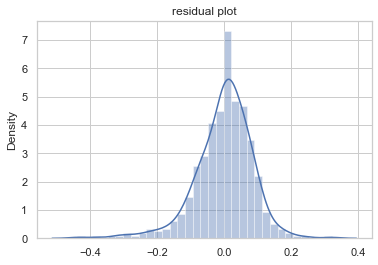

In [68]:
res=y_train-y_train_pred
sns.distplot(res)
plt.title('residual plot')

### Note: Residuals distribution should follow normal distribution and centred around 0.(mean = 0). this assumption about residuals by plotting a dist plot of residuals and see if residuals are following normal distribution or not. The above diagram shows that the residuals are distributed about mean = 0.

# reparing the test set

## rescalling the test set

In [69]:
df_test[num_features] = scale.transform(df_test[num_features])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
333,0,0,1,0.341207,0.632030,0.488582,0.413139,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
203,0,0,0,1.013904,0.515242,0.185727,0.375403,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
279,0,0,1,0.579699,0.705024,-0.049804,0.570985,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
483,1,0,0,0.512322,0.604980,0.154750,0.722734,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
267,0,0,0,0.737981,0.870760,0.010767,0.573861,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [70]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.540909,0.040909,0.627273,0.577486,0.652310,0.305077,0.529134,0.250,0.245455,0.227273,0.077273,0.068182,0.077273,0.109091,0.100000,0.081818,0.063636,0.050000,0.068182,0.081818,0.122727,0.122727,0.163636,0.168182,0.136364,0.122727,0.145455,0.650000,0.327273
std,0.499460,0.198531,0.484633,0.244429,0.141169,0.168920,0.221141,0.434,0.431338,0.420026,0.267633,0.252632,0.267633,0.312464,0.300684,0.274713,0.244661,0.218442,0.252632,0.274713,0.328872,0.328872,0.370789,0.374881,0.343957,0.328872,0.353363,0.478057,0.470288
min,0.000000,0.000000,0.000000,0.049103,0.311386,-0.049804,0.089623,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.371060,0.551846,0.185059,0.381040,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.588790,0.641738,0.283969,0.525311,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.780492,0.752576,0.406005,0.705476,0.250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.029946,1.002146,0.800818,0.981707,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Test data set

In [71]:
y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
X_test_sm = sm.add_constant(X_test)
model_cols = lr_model.params.keys().tolist()
X_test_sm = X_test_sm[model_cols]

# Prediction and evalution

# predict on test set

In [73]:
y_test_pred = lr_model.predict(X_test_sm)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8023857533285474